In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
import os
import glob

In [22]:
df.columns

Index(['genome', 'threshold', 'cluster_method', 'comparison_algorithm',
       'greedy_representative', 'primary_cluster',
       'original_secondary_cluster', 'secondary_cluster', 'num', 'cl_qual'],
      dtype='object')

In [23]:
df = pd.read_csv('input/Cdb.csv')
df = df[['genome','secondary_cluster']]
# add column with the number of clusters
num = df['secondary_cluster'].value_counts()
df['num'] = df['secondary_cluster'].map(num)
df['cl_qual'] = df['genome'].str[0]

df.tail(2)

,genome,secondary_cluster,num,cl_qual
3899,L1628_CAG-611_undS.fa,374_1,1,L
3900,L1632_HGM05190_sp900759815.fa,663_1,1,L


In [27]:
(df['num'] > 1)

3899    False
3900    False
Name: num, dtype: bool

In [30]:
# select cl_qual L, num > 1 and L and H in the same cluster
low_cl = len(df[(df['cl_qual'] == 'L') & (df['num'] > 1)])
hq_cl = len(df[(df['cl_qual'] == 'H') & (df['num'] > 1)])

hq_cl

992

In [14]:
uq = df[df['num'] ==1]
# first letter of genome column to new column
#uq['cl_qual'] = uq['genome'].str[0]

uq.head(2)


,genome,threshold,cluster_method,comparison_algorithm,greedy_representative,primary_cluster,original_secondary_cluster,secondary_cluster,num
17,L0792_UBA11524_sp000437595.fa,0.05,greedy,fastANI,True,1964,1964_4,1964_4,1
19,L1355_UBA11524_undS.fa,0.05,greedy,fastANI,True,1964,1964_2,1964_2,1


In [ ]:
# vienn diagram
from matplotlib_venn import venn2
from matplotlib_venn import venn3

# set figure size
plt.figure(figsize=(10,10))

# make venn diagram
venn2(subsets = (len(uq[uq['cl_qual'] == 'H']), len(uq[uq['cl_qual'] == 'L']), len(uq[uq['cl_qual'] == 'H'] & len(uq[uq['cl_qual'] == 'L']))), set_labels = ('High quality', 'Low quality'))


## Contigs stat vizualization

In [11]:
с1 = cs['contigs']/1000

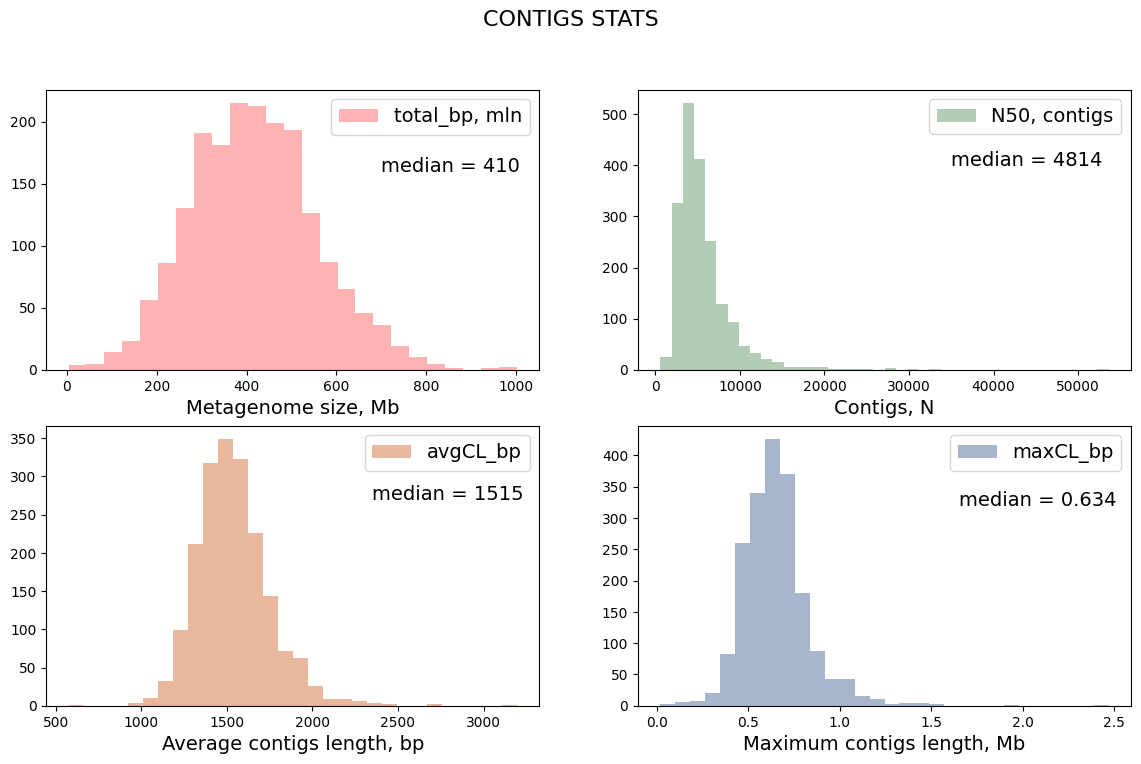

In [64]:
plt.rcParams["figure.figsize"] = [14,8]
plt.suptitle('CONTIGS STATS', fontsize=16) 

plt.subplot(2,2,1)
plt.hist(cs['total_bp']/1000000,bins=25, color = 'red', alpha=0.3)
plt.xlabel('Metagenome size, Mb', fontsize=14)
plt.legend(['total_bp, mln'],loc='upper right', prop={'size': 14})
m1 = str((cs['total_bp']/1000000).median())[0:3]
plt.text(700, 160, 'median = '+str(m1), fontsize=14)

plt.subplot(2,2,2)
plt.hist(cs['N50'],bins=40, color = '#80aa85', alpha=0.6)
plt.xlabel('Contigs, N', fontsize=14)
plt.legend(['N50, contigs'],loc='upper right', prop={'size': 14})
m1 = str(cs['N50'].median())[0:4]
plt.text(35000, 400, 'median = '+str(m1), fontsize=14)

plt.subplot(2,2,3)
plt.hist(cs['avgCL_bp'],bins=30, color = '#db875b', alpha=0.6)
plt.xlabel('Average contigs length, bp', fontsize=14)
plt.legend(['avgCL_bp'],loc='upper right', prop={'size': 14})
m2 = str(cs['avgCL_bp'].median())[0:4]
plt.text(2350, 270, 'median = '+str(m2), fontsize=14)

plt.subplot(2,2,4)
plt.hist(cs['maxCL_bp']/1000000,bins=30, color = '#6d86ad', alpha=0.6)
plt.xlabel('Maximum contigs length, Mb', fontsize=14)
plt.legend(['maxCL_bp'],loc='upper right', prop={'size': 14})
m3 = str((cs['maxCL_bp']/1000000).median())[0:5]
plt.text(1.65, 320, 'median = '+str(m3), fontsize=14)

plt.savefig('results/ContigsStats_BGI.jpg', dpi = 400, bbox_inches = 'tight')
plt.savefig('results/ContigsStats_BGI.svg', bbox_inches = 'tight')

## How does the number of reads correlate with assembly statistics?

In [6]:
rn = pd.read_csv('input/ReadsNumb_BGI.csv')
rn['nameS'] = rn['name'].str.split('_',expand=True)[1]
rn.head(2)

,name,reads_numb,nameS
0,lab20_V3276M_E100013465_L01,109810982,V3276M
1,lab20_V32MIP_E100009727_L01,102273989,V32MIP


In [7]:
mrg = pd.merge(rn, cs, on='nameS')
mrg = mrg.loc[:, mrg.columns!='path']
mrg = mrg.loc[:, mrg.columns!='minCL_bp']
mrg.to_csv('results/Mrg_BGI.csv', index=False)
mrg.head(2)

,name,reads_numb,nameS,total_bp,maxCL_bp,avgCL_bp,N50,contigs
0,lab20_V3276M_E100013465_L01,109810982,V3276M,407116049,673015,1611,6301,252608
1,lab20_V32MIP_E100009727_L01,102273989,V32MIP,667657595,578836,1861,9188,358581


In [8]:
mrg.columns.tolist()
cols = ['nameS','reads_numb','name','total_bp','maxCL_bp','avgCL_bp','N50','contigs']
#mrg = mrg[cols]
mrg.head(2)

,name,reads_numb,nameS,total_bp,maxCL_bp,avgCL_bp,N50,contigs
0,lab20_V3276M_E100013465_L01,109810982,V3276M,407116049,673015,1611,6301,252608
1,lab20_V32MIP_E100009727_L01,102273989,V32MIP,667657595,578836,1861,9188,358581


In [9]:
len(mrg)

1900

In [35]:
mrg.to_csv('results/ContigsRNumbStats_BGI.csv', index=False)

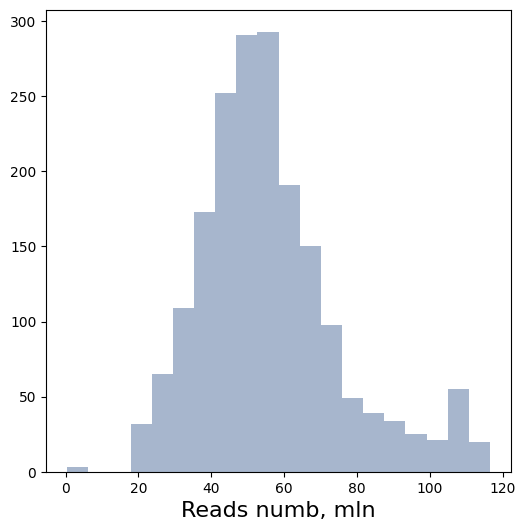

In [39]:
plt.rcParams["figure.figsize"] = [6,6]

plt.hist(mrg['reads_numb']/1000000,bins=20, color = '#6d86ad', alpha=0.6)
plt.xlabel('Reads numb, mln', fontsize=16)

plt.savefig('results/RN.jpg', dpi = 400, bbox_inches = 'tight')

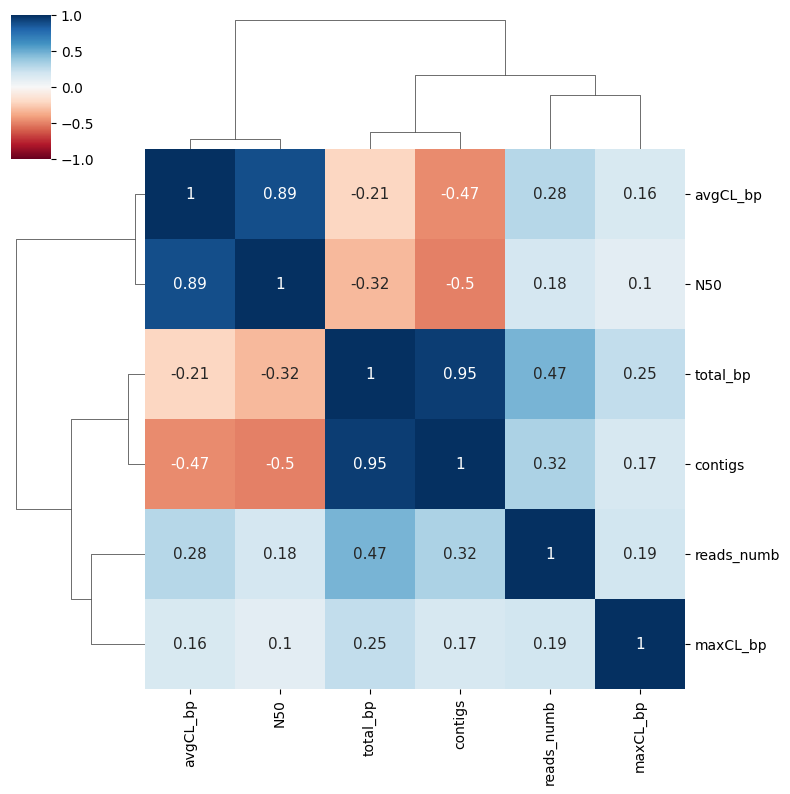

In [40]:
cor = mrg[['reads_numb','total_bp','maxCL_bp','avgCL_bp','N50','contigs']].corr( )

sns.clustermap(cor, method="complete", cmap='RdBu', annot=True,
               annot_kws={"size": 11}, vmin=-1, vmax=1, figsize=(8,8));

plt.savefig('results/Corr_RN_vs_Contigs.jpg', dpi = 400, bbox_inches = 'tight')

Don't see strong correlation between reads number and contigs stats.
Total metagenome size slitely correlated with reads number, but average contig length doesn't grow.

It woould be interesting to check correlation between reads number and HQ bins number.

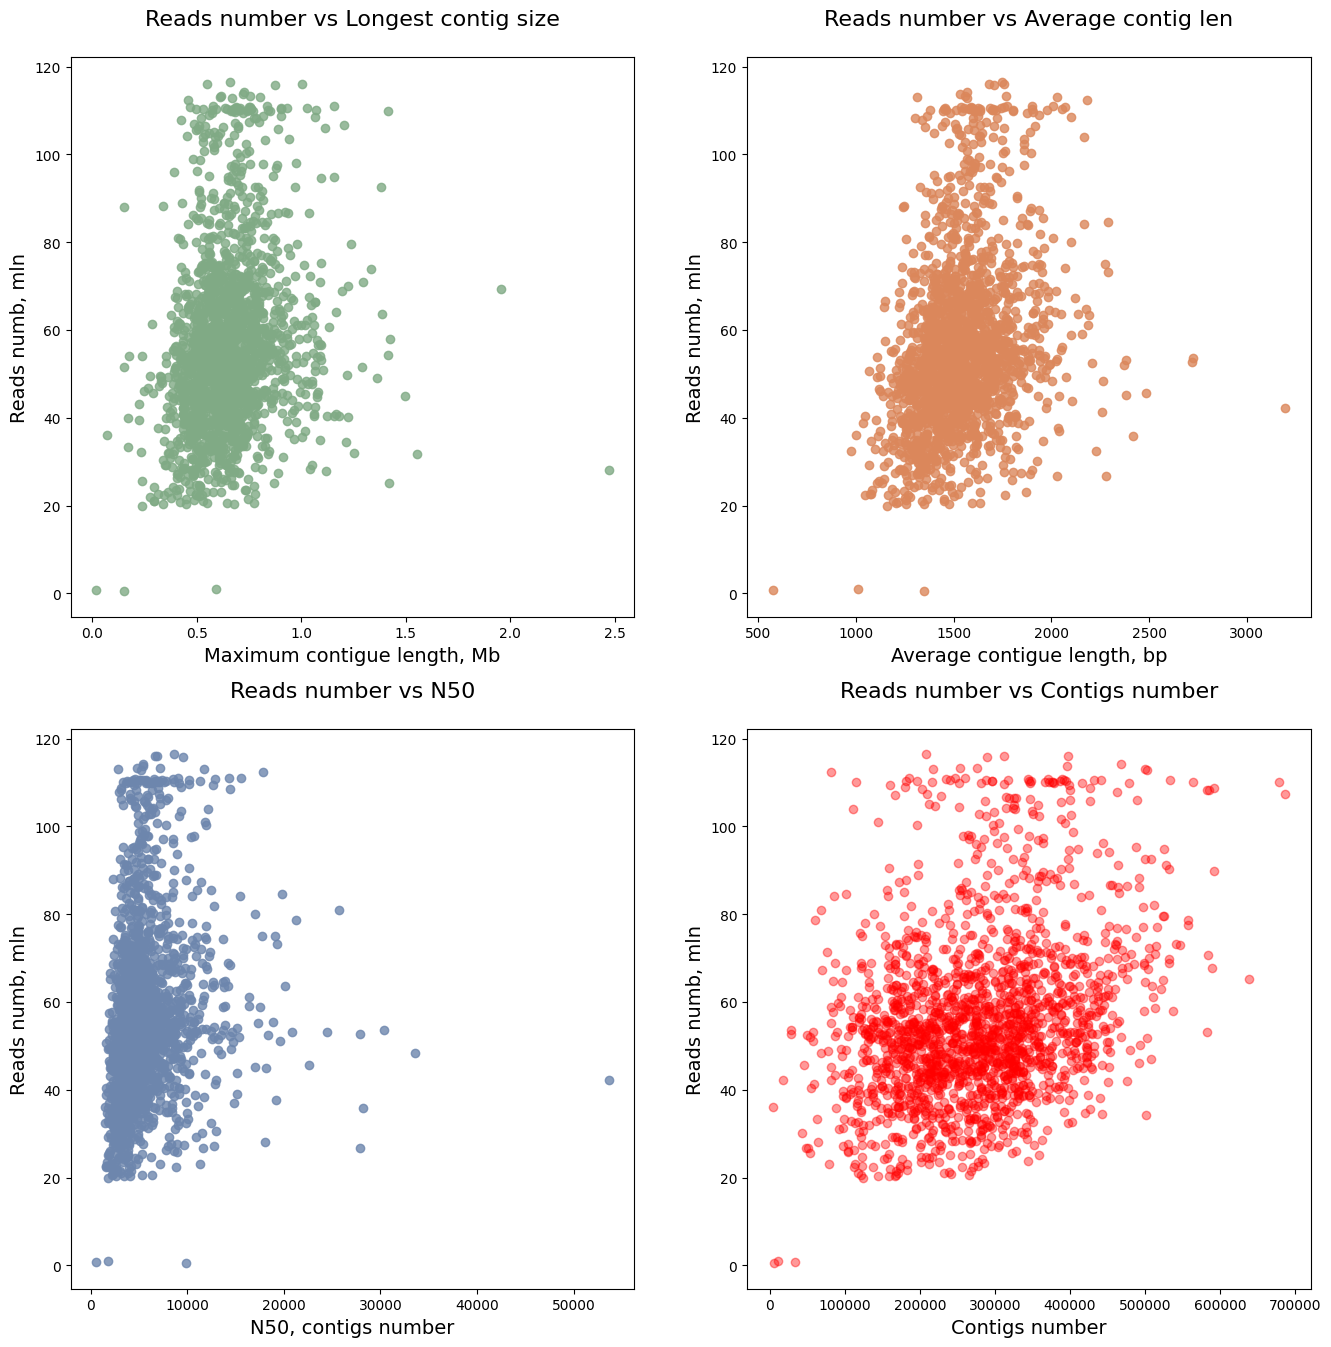

In [14]:
plt.rcParams["figure.figsize"] = [16,16]

plt.subplot(2,2,1)
plt.title('Reads number vs Longest contig size'+'\n', fontsize=16)
plt.scatter(y=mrg['reads_numb']/1000000, x=mrg['maxCL_bp']/1000000, color = '#80aa85', alpha=0.8)
plt.ylabel('Reads numb, mln', fontsize=14)
plt.xlabel('Maximum contigue length, Mb', fontsize=14)

plt.subplot(2,2,2)
plt.title('Reads number vs Average contig len'+'\n', fontsize=16)
plt.scatter(y=mrg['reads_numb']/1000000, x=mrg['avgCL_bp'], color = '#db875b', alpha=0.8)
plt.ylabel('Reads numb, mln', fontsize=14)
plt.xlabel('Average contigue length, bp', fontsize=14)

plt.subplot(2,2,3)
plt.title('Reads number vs N50'+'\n', fontsize=16)
plt.scatter(y=mrg['reads_numb']/1000000, x=mrg['N50'], color = '#6d86ad', alpha=0.8)
plt.ylabel('Reads numb, mln', fontsize=14)
plt.xlabel('N50, contigs number', fontsize=14)

plt.subplot(2,2,4)
plt.title('Reads number vs Contigs number'+'\n', fontsize=16)
plt.scatter(y=mrg['reads_numb']/1000000, x=mrg['contigs'], color = 'red', alpha=0.4)
plt.ylabel('Reads numb, mln', fontsize=14)
plt.xlabel('Contigs number', fontsize=14)

plt.savefig('results/RN_vs_ContStat.jpg', dpi = 400, bbox_inches = 'tight')